----------------------------

In [18]:
import os
import shutil
#from image_loader import LoadImage
#from image_preprocesser import PreprocessImage
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

### **Create the directories**

In [10]:
#Set the directory with the folders fracture and nofracture
base_path = "../1-Data/ml-dp"

#Create the directories train, validation and test
train_dir = os.path.join(base_path, "train")
os.mkdir(train_dir)
val_dir = os.path.join(base_path, "val")
os.mkdir(val_dir)
test_dir = os.path.join(base_path, "test")
os.mkdir(test_dir)

#Create the directories fracture and no fracture in train, valiadtion and test directories
train_fracture_dir = os.path.join(train_dir, "fracture")
os.mkdir(train_fracture_dir)
train_nofracture_dir = os.path.join(train_dir, "nofracture")
os.mkdir(train_nofracture_dir)
val_fracture_dir = os.path.join(val_dir, "fracture")
os.mkdir(val_fracture_dir)
val_nofracture_dir = os.path.join(val_dir, "nofracture")
os.mkdir(val_nofracture_dir)
test_fracture_dir = os.path.join(test_dir, "fracture")
os.mkdir(test_fracture_dir)
test_nofracture_dir = os.path.join(test_dir, "nofracture")
os.mkdir(test_nofracture_dir)

In [11]:
#Print the length of fracture and nofracture directories
fracture = "../1-Data/ml-dp/fracture"
nofracture = "../1-Data/ml-dp/nofracture"

fraction_fracture = 0.8 * len(os.listdir(fracture))
print("Number of fracture's images in train:", 0.8 * fraction_fracture)
print("Number of fracture's images in validation:", 0.2 * fraction_fracture)
print("Number of fracture's images in test:", 0.2 * len(os.listdir(fracture)))

fraction_nofracture = 0.8 * len(os.listdir(nofracture))
print("Number of nofracture's images in train:", 0.8 * fraction_nofracture)
print("Number of nofracture's images in validation:", 0.2 * fraction_nofracture)
print("Number of nofracture's images in test:", 0.2 * len(os.listdir(nofracture)))


Number of fracture's images in train: 1238.4
Number of fracture's images in validation: 309.6
Number of fracture's images in test: 387.0
Number of nofracture's images in train: 1217.2800000000002
Number of nofracture's images in validation: 304.32000000000005
Number of nofracture's images in test: 380.40000000000003


In [12]:
#Copy images from one directory to another
fnames = [i for i in os.listdir("../1-Data/ml-dp/fracture")[0:1238]]
for fname in fnames:
  src = os.path.join(fracture ,fname)
  dst = os.path.join(train_fracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/fracture")[1238:1548]]
for fname in fnames:
  src = os.path.join(fracture ,fname)
  dst = os.path.join(val_fracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/fracture")[1548:]]
for fname in fnames:
  src = os.path.join(fracture ,fname)
  dst = os.path.join(test_fracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/nofracture")[0:1217]]
for fname in fnames:
  src = os.path.join(nofracture ,fname)
  dst = os.path.join(train_nofracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/nofracture")[1217:1522]]
for fname in fnames:
  src = os.path.join(nofracture ,fname)
  dst = os.path.join(val_nofracture_dir, fname)
  shutil.copyfile(src,dst)

fnames = [i for i in os.listdir("../1-Data/ml-dp/nofracture")[1522:]]
for fname in fnames:
  src = os.path.join(nofracture ,fname)
  dst = os.path.join(test_nofracture_dir, fname)
  shutil.copyfile(src,dst)

### **Load and Preprocessing images**

In [13]:
#Create a generator to preprocessing images using the class ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalizing images
    rotation_range=10, #rotating images 10º
    width_shift_range=0.1, #traslating images 10%
    height_shift_range=0.1, #traslating images 10%
    zoom_range=0.1, #10% zoom
    horizontal_flip=True) 

val_datagen = ImageDataGenerator(
    rescale=1./255
    )

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [14]:
#Load and preprocessing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (256, 256),
    batch_size = 20,
    class_mode='binary',
    shuffle=False #images are loading in the original order
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 20,
    class_mode='binary',
    shuffle=False
)

Found 2455 images belonging to 2 classes.
Found 615 images belonging to 2 classes.
Found 767 images belonging to 2 classes.


----------------

### **Construct a CNN**

In [15]:
#Construct the model 
model = models.Sequential()
#First layer with teh image format (resolution and channels)
model.add(layers.Input(shape=(256, 256, 3))) 
#Convolution layer with 32 kernels 3x3, activation function relu
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#Reducing dimesionality wits a MaxPooling 2x2
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#Convert the characteristics to an unidemintional vector before construct the Dense layer
model.add(layers.Flatten())
#Desnse layer or fully connected layer with 512 neurons
model.add(layers.Dense(512, activation='relu'))
#To prevent overfitting, 50% of neurons will be out randomly during train
model.add(layers.Dropout(0.5))
#Las layer with 1 node (binary classification and a sigmoid activation)
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,079,553 (99.49 MB)

 Trainable params: 26,079,553 (99.49 MB)

 Non-trainable params: 0 (0.00 B)

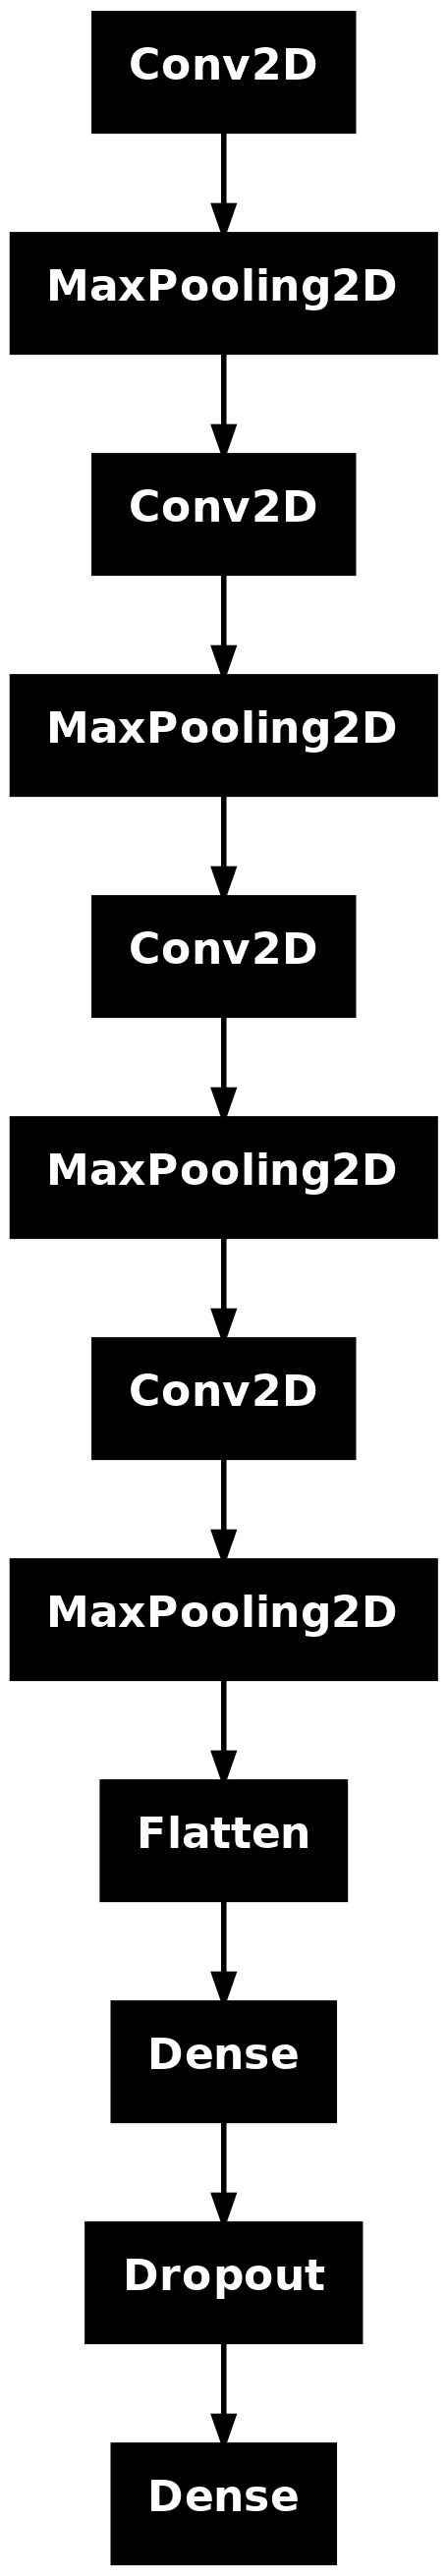

In [16]:
tf.keras.utils.plot_model(model)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #learning rate 0.001

In [21]:
#Callback to reduce learning rate when val_loss in 0.5 doesn't improve in 3 epochs. Minimum learning rate = 1e-6
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,         
    patience=3,          
    min_lr=1e-6
)

#Callback for stop running model when val_loss doesn't improve in 5 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True  
)

#Train the model 
history = model.fit(
    train_generator,
    steps_per_epoch = 150, #numer of imagen in each epoch
    epochs = 100,                
    validation_data = val_generator,
    callbacks=[reduce_lr, early_stopping]  
)

Epoch 1/100


E0000 00:00:1731068306.319253 2266671 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1731068306.372074 2266671 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-11-08 13:18:26.377406: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_2260473/2030067794.py", line 17, in <module>

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/dtbird/Documentos/OsteoAI/venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_2592]

#train_dir = "../1-Data/ml-dp/train"
loader = LoadImage(train_dir)

images_train = loader.images
names_train = loader.names

print(f"Number of images: {len(images_train)}") 
loader.plot_images_with_bboxes() 

loader = LoadImage(image_path='/ruta/a/imagenes', label_path='/ruta/a/labels')

#Train
preprocessor_train = PreprocessImage(images_train) 
resized_images_train, _ = preprocessor_train.resize_images_and_labels() #_ indicates that we don't have labels

resized_preprocessor_train = PreprocessImage(resized_images_train)
gray_images_train = resized_preprocessor_train.convert_to_grayscale()

normalized_preprocessor_train = PreprocessImage(gray_images_train)
normalized_images_train = normalized_preprocessor_train.normalize_images()

preprocessor = PreprocessImage(images, labels)
resized_images, labels = preprocessor.resize_images_and_labels()